
## Context:

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa.
Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.


## Objective:

The objective of this competition is to explore and build a linear regression model that will predict the spending behaivior of tourists visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania. 


## Data Description

The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.
The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.


## Importing necessary libraries and data

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder # Encode categorical data to numerical form
%matplotlib inline

#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [135]:
# import datasets
df = pd.read_csv("Train .csv")

df2 = pd.read_csv("Test .csv")

## Data Overview

- Observations
- Sanity checks

OVERVIEW TRAIN DATASET

In [136]:
df.shape
# 4809 rows and 23 columns

(4809, 23)

In [137]:
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [138]:
df.info()
# Observe the datatypes within the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [139]:
df.describe()
# statistical overview of the dataset

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [140]:
df.isnull().sum()
# checking for missing values

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [141]:
df.duplicated().sum()
# Checking for duplicated cells

0

In [142]:
df2.shape

(1601, 22)

In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

Replace Missing Values

In [144]:
train_data = df.copy()
test_data = df2.copy()
#assigning a new variable name to the datasets

In [145]:
#replacing the nan values in the travel_with column of the training data with Alone

train_data['travel_with'] = train_data['travel_with'].replace(np.nan, 'Alone')

In [146]:
#replacing the nan values in the total_female column of the training data with 1.0

train_data['total_female'] = train_data['total_female'].replace(np.nan, 1.0)

In [147]:
#replacing the nan values in the total_male column of the training data with 1.0

train_data['total_male'] = train_data['total_male'].replace(np.nan, 1.0)

In [148]:
#replacing the nan values in the most_impressing column of the training data with No comments

train_data['most_impressing'] = train_data['most_impressing'].replace(np.nan, 'No comments')

In [149]:
#replacing the nan values in the travel_with column of the testing data with Alone

test_data['travel_with'] = test_data['travel_with'].replace(np.nan, 'Alone')

In [150]:
#replacing the nan values in the total_female column of the testing data with 1.0

test_data['total_female'] = test_data['total_female'].replace(np.nan, 1.0)

In [151]:
#replacing the nan values in the total_male column of the testing data with 1.0

test_data['total_male'] = test_data['total_male'].replace(np.nan, 1.0)

In [152]:
#replacing the nan values in the most_impressing column of the testing data with No comments

test_data['most_impressing'] = test_data['most_impressing'].replace(np.nan, 'No comments')

In [153]:
#replacing 24-jan to 1-24 to correlate with 

test_data['age_group'] = test_data['age_group'].replace('24-Jan', '1-24')

In [154]:
# Create new columns for total tourists and total nights

train_data["total_nights"] = train_data["night_mainland"] + train_data["night_zanzibar"]

train_data["total_tourists"] = train_data["total_male"] + train_data["total_female"]

test_data["total_nights"] = test_data["night_mainland"] + test_data["night_zanzibar"]

test_data["total_tourists"] = test_data["total_male"] + test_data["total_female"]

## Exploratory Data Analysis (EDA)



- Look to understand the data better
- Visualize the relationships within the dataset
- Gain insight and answer critical questions that will influence machine training

## Univariate Analysis

<Axes: xlabel='age_group', ylabel='count'>

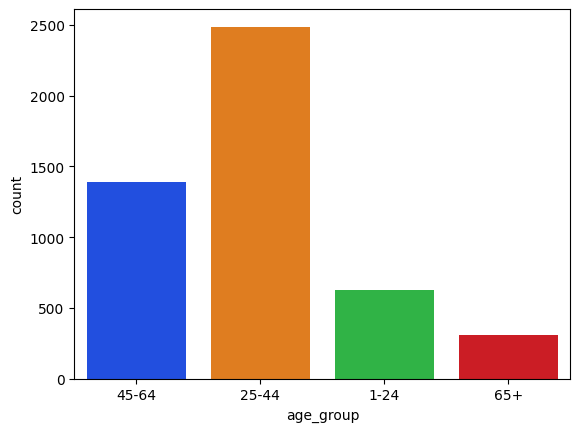

In [155]:
# countplot by age group
sns.countplot(data=train_data, x= 'age_group', palette="bright")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Wildlife tourism'),
  Text(1, 0, 'Cultural tourism'),
  Text(2, 0, 'Mountain climbing'),
  Text(3, 0, 'Beach tourism'),
  Text(4, 0, 'Conference tourism'),
  Text(5, 0, 'Hunting tourism'),
  Text(6, 0, 'Bird watching'),
  Text(7, 0, 'business'),
  Text(8, 0, 'Diving and Sport Fishing')])

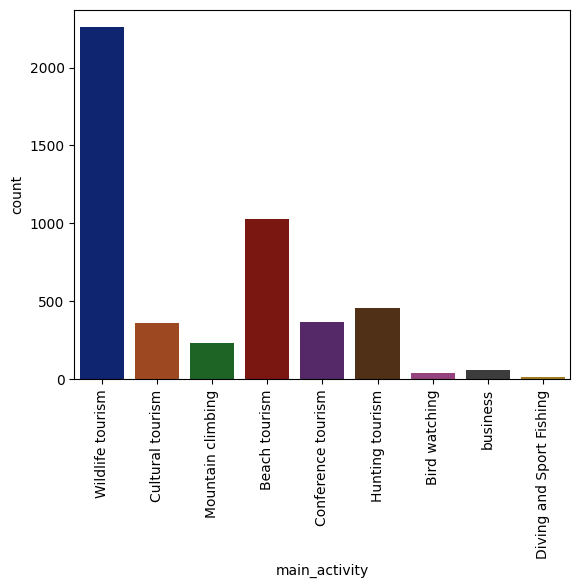

In [156]:
sns.countplot(data=train_data, x='main_activity', palette="dark" )
plt.xticks(rotation= 90)
# wildlife tourism is the most popular activity

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Friends, relatives'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Travel, agent, tour operator'),
  Text(3, 0, 'Radio, TV, Web'),
  Text(4, 0, 'Tanzania Mission Abroad'),
  Text(5, 0, 'inflight magazines'),
  Text(6, 0, 'Newspaper, magazines,brochures'),
  Text(7, 0, 'Trade fair')])

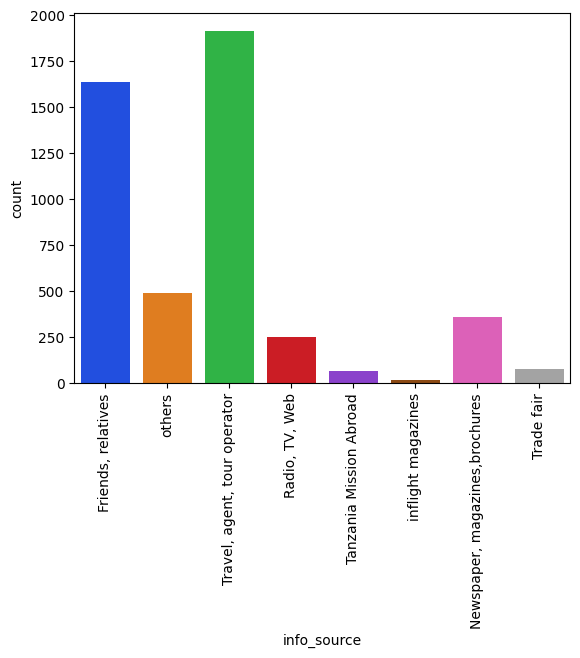

In [157]:
sns.countplot(data=train_data, x='info_source', palette="bright")
plt.xticks(rotation= 90)

<Axes: xlabel='tour_arrangement', ylabel='count'>

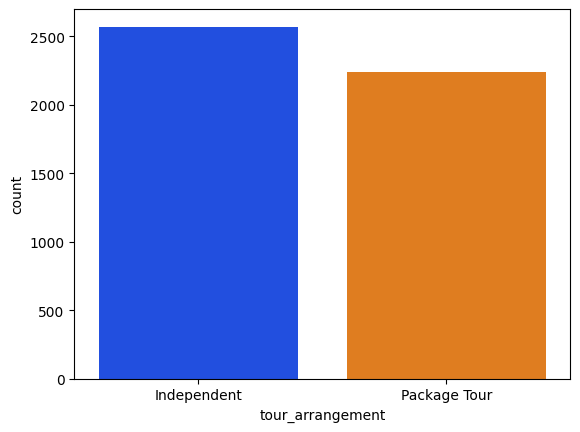

In [158]:

sns.countplot(data= train_data, x='tour_arrangement', palette="bright")

<Axes: xlabel='package_insurance', ylabel='count'>

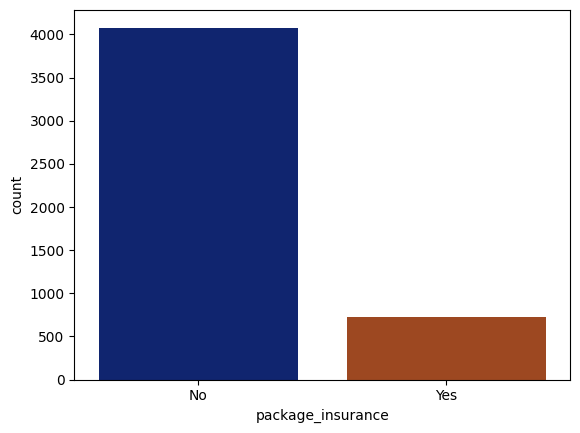

In [159]:
sns.countplot(data=train_data, x='package_insurance', palette="dark")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friendly People'),
  Text(1, 0, 'Wonderful Country, Landscape, Nature'),
  Text(2, 0, 'Excellent Experience'),
  Text(3, 0, 'No comments'),
  Text(4, 0, ' Wildlife'),
  Text(5, 0, 'Good service'),
  Text(6, 0, 'Satisfies and Hope Come Back')])

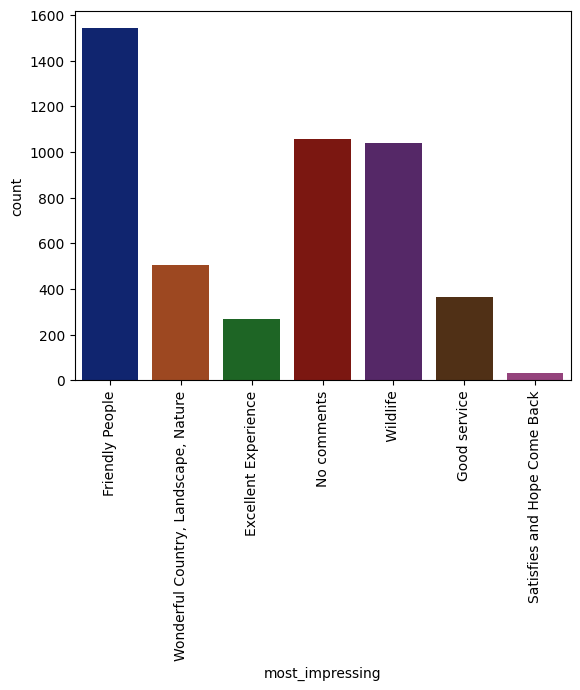

In [160]:
sns.countplot(data=train_data, x='most_impressing', palette="dark")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Cash'),
  Text(1, 0, 'Credit Card'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Travellers Cheque')])

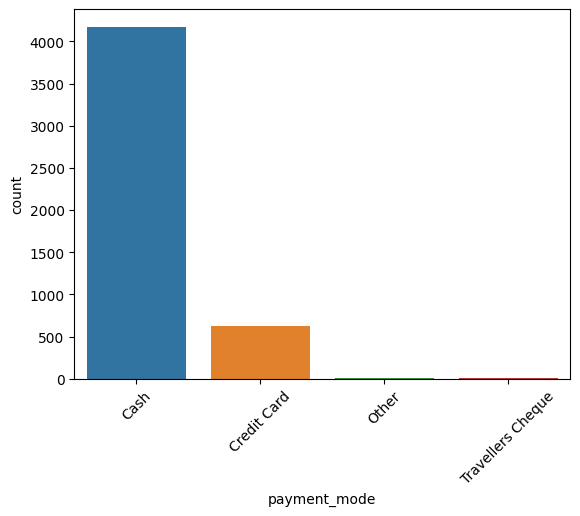

In [161]:
sns.countplot( x = "payment_mode", data = train_data)
plt.xticks(rotation = 45)


#OBSERVATIONS FROM UNIVARIATE ANALYSIS
- People between ages 25-44 are the most frequent visitors. Elderly people (65+) are the least visiting group.

- The most popular activity for tourists is wildlife tourism. The least explored activities are driving, sport fishing and bird watching.

- Most tourists preferred to source information from travel agents, tour operators and from family and friends. Ironically, Tanzania mission abroad is the least popular information source. 

- Most tourists prefer to arrange for their visits than subscribe for the available packaged tours. Perhaps the available packaged tours need to be made more enticing
- Most preferred payment method is cash, followed by credit card

## Multivariate Analysis

In [162]:
top5 = train_data.groupby(by='country').sum().sort_values(by='total_cost', ascending=False).head(5)
top5.reset_index(inplace=True)
top5.head(5)

# This represents the overall spendings from the top 5 countries
# This follows the total number of people that visit Tanzania in terms of number of people coming
# However, this does not imply that citizens from these countries are spending more, but that they have the largest
# population of toursts visiting Tanzania
# Here we used the ".sum()" function

,country,total_female,total_male,night_mainland,night_zanzibar,total_cost,total_nights,total_tourists
0,UNITED STATES OF AMERICA,711.0,650.0,7007.0,742.0,8.890832e+09,7749.0,1361.0
1,UNITED KINGDOM,519.0,472.0,6363.0,1375.0,3.808383e+09,7738.0,991.0
2,ITALY,473.0,477.0,1689.0,2276.0,3.762160e+09,3965.0,950.0
3,FRANCE,376.0,359.0,2383.0,1239.0,3.344496e+09,3622.0,735.0
4,AUSTRALIA,185.0,126.0,1647.0,348.0,2.743132e+09,1995.0,311.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UNITED STATES OF AMERICA'),
  Text(1, 0, 'UNITED KINGDOM'),
  Text(2, 0, 'ITALY'),
  Text(3, 0, 'FRANCE'),
  Text(4, 0, 'AUSTRALIA')])

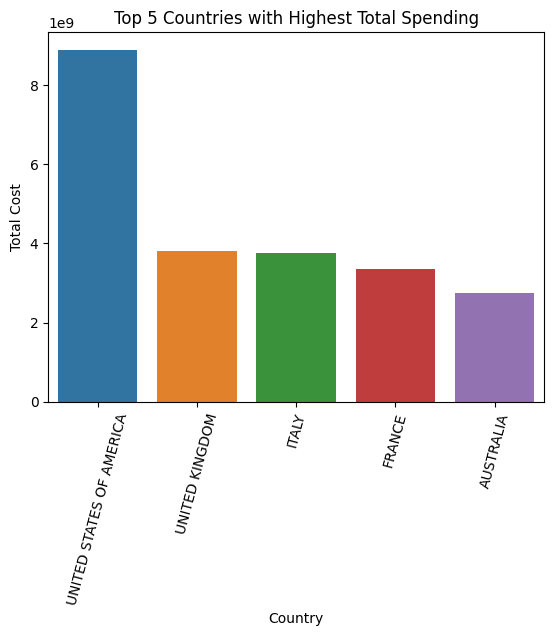

In [163]:
sns.barplot(x='country', y='total_cost', data=top5)

plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.title('Top 5 Countries with Highest Total Spending')

plt.xticks(rotation=75)

In [164]:
top5_mean = train_data.groupby(by='country').mean().sort_values(by='total_cost', ascending=False).head(5)
top5_mean.reset_index(inplace=True)
top5_mean.head(5)

# Using this, it shows that, although there are fewer people from the Group A countries 
# (Dominica, Costarica, Slovenia, Tunisia, Australia) visiting Tanzania in comparison to people coming from 
# the Group B countries (USA,UK, Italy, France, Austrlia), the average spending of the people from 
# the group A countries is comparatively higher than those in the Group B countries
# Here we use the ".mean()" function
#It calculates the mean of the values for each country in the DataFrame df instead of summing them up. 
#The resulting DataFrame top5 will contain the top 5 countries with the highest average total cost.

,country,total_female,total_male,night_mainland,night_zanzibar,total_cost,total_nights,total_tourists
0,DOMINICA,2.000000,2.000000,5.000000,0.000000,3.315000e+07,5.000000,4.000000
1,COSTARICA,1.000000,0.000000,4.000000,0.000000,2.718300e+07,4.000000,1.000000
2,SLOVENIA,1.000000,1.000000,0.000000,14.000000,1.906237e+07,14.000000,2.000000
3,TUNISIA,0.000000,1.000000,36.000000,0.000000,1.574625e+07,36.000000,1.000000
4,AUSTRALIA,0.994624,0.677419,8.854839,1.870968,1.474802e+07,10.725806,1.672043


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'DOMINICA'),
  Text(1, 0, 'COSTARICA'),
  Text(2, 0, 'SLOVENIA'),
  Text(3, 0, 'TUNISIA'),
  Text(4, 0, 'AUSTRALIA')])

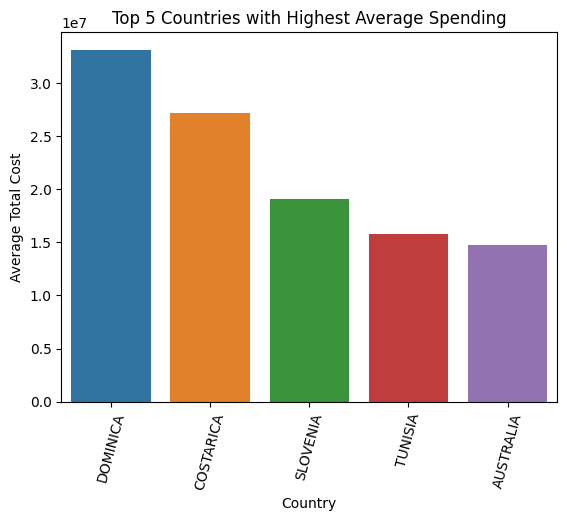

In [165]:
sns.barplot(x='country', y='total_cost', data=top5_mean)

plt.xlabel('Country')
plt.ylabel('Average Total Cost')
plt.title('Top 5 Countries with Highest Average Spending')

plt.xticks(rotation=75)

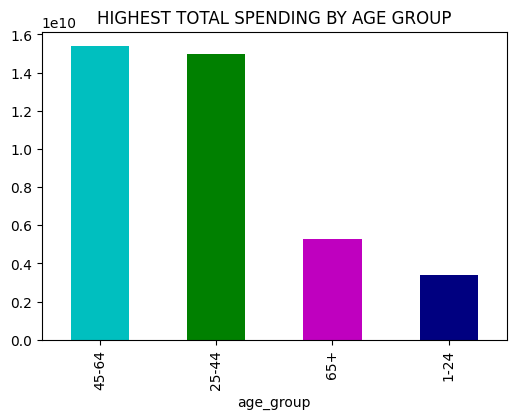

In [166]:
top_5_spendings= (train_data.groupby('age_group')['total_cost'].sum()).nlargest().plot(kind = "bar", 
                                                                                       color=['c','g','m','navy','r'],
hatch='',title='HIGHEST TOTAL SPENDING BY AGE GROUP',figsize=(6,4))

# This represents the sum total of spendings by age group
# This also correlates with the age groups with the highest count
# This is because this age group has the highest number of tourists

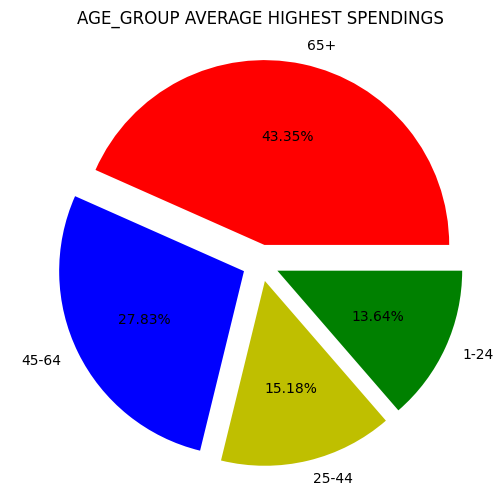

In [167]:
ag_sp_tw = train_data.groupby(['age_group'])['total_cost'].mean().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['r','blue','y','g'],title='AGE_GROUP AVERAGE HIGHEST SPENDINGS',
explode = (0.1,0.1,0.1,0.1),shadow = False, figsize=[6,6],ylabel = ' ',)

# A pie chat showing the age-groups with the highest average spending


- This data shows the group with the highest spending power
- the 65+ group had an average spending of 17,211,950 million dollars
- the age group 45-64 spent on average 11,050,930 million dollars
- the group with the highest total number of visitors (25-44) only spent an average of 6,026,176 million dollars

In [168]:
average_nights_Mainland = train_data["night_mainland"].mean()
average_nights_Mainland

8.488043252235393

In [169]:
average_nights_Zanzibar = train_data["night_zanzibar"].mean()
average_nights_Zanzibar

2.30442919525889

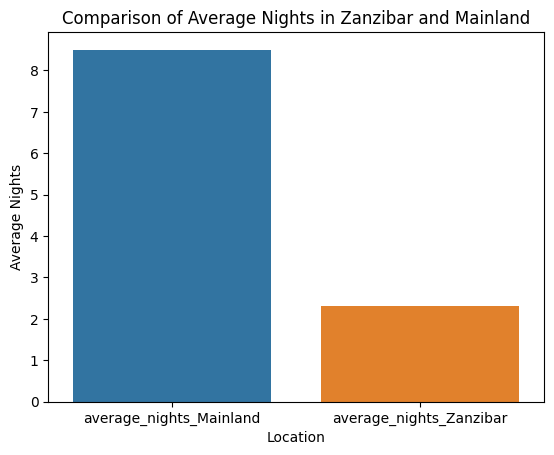

In [170]:
categories = ['average_nights_Mainland', 'average_nights_Zanzibar']
average_nights = [8.5, 2.3]

# Create a bar plot
sns.barplot(x=categories, y=average_nights)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Average Nights')
plt.title('Comparison of Average Nights in Zanzibar and Mainland')

plt.show()

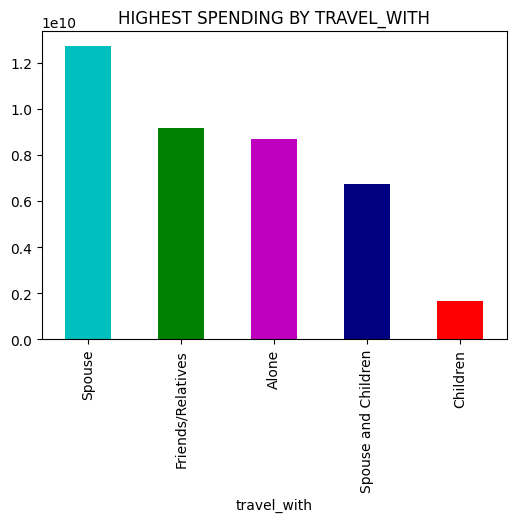

In [171]:

#bar chart of highest spenders by travel_with
ag_sp_tw = train_data.groupby(['travel_with'])['total_cost'].sum().nlargest().plot(kind='bar',color=['c','g','m','navy','r'],
hatch='',title='HIGHEST SPENDING BY TRAVEL_WITH',figsize=(6, 4))

<Axes: ylabel='Density'>

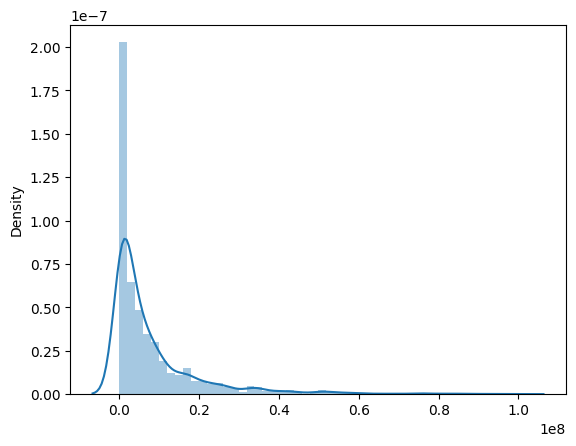

In [172]:
sns.distplot(x=train_data.total_cost)
# This shows a highly right-skewed data
# This form of data distribution might affect the predictive accuracy of the machine learning model

<Axes: >

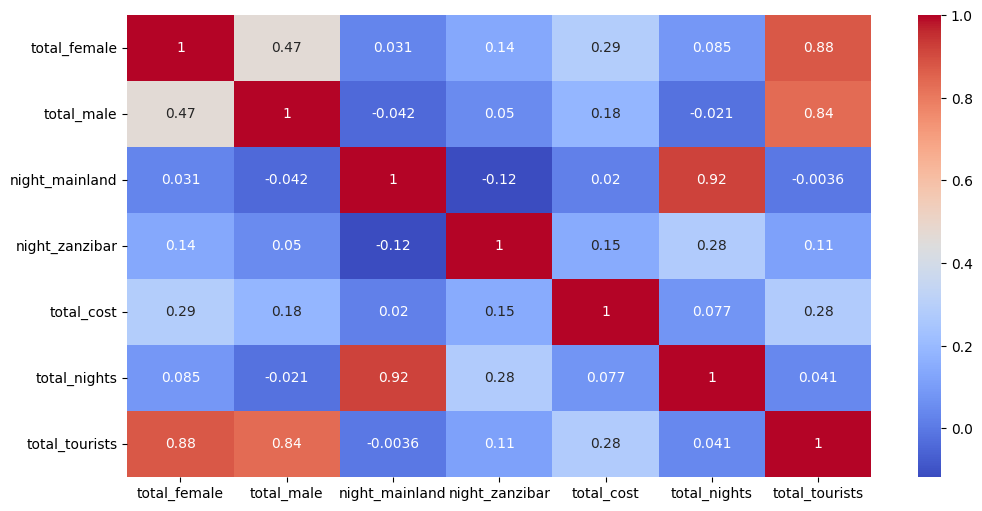

In [173]:
#heatmap to show correlation between features
plt.figure(figsize = (12, 6))
sns.heatmap(train_data.corr(),cmap='coolwarm',annot=True)

**Questions**:
1. What are the top 5 countries with the highest spending statistic ?
- Highest total spending - USA, UK, Italy, France, Australia
- Highest Average spending - Dominica, Costarica, Slovenia, Tunisia, Australia

2. which age-group are the highest spenders and who are the over all highest spenders by travel with?
- Highest total spenders - 45-64
- Highest Average spending - 65+
- Overall spenders by "travel with" - "Spouse" 
 
3. which countries have the most spending tourists? 
- Country with the most spending tourists - Dominica (Average spening 33,150,000 TZS)
 
4. what is the average number of nights a toursits spends in Tanzania mainland?
- 8 nights

5. what is the average number of nights a toursits spends in Zanzibar?
- 2 nights
 
5. what is the most prefered payment mode by tourists?
- Cash

7. Highlight the Aspects of tourism that are more profitable and in which it is worthwhile to invest in
- Wildlife tourism

8. what is the most sort after food by tourists?
- Information not given in data. Maybe cow leg peppersoup




## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Feature importance
- scaling

MODEL TRAINING

In [174]:
# Add the train and test datasets together
# assign binary indicators (1,0) to train and test data sets to allow us differentiate between the two datasets
train_data['train'] = 1
test_data['train'] = 0

# concatenate the train and test datasets
# drop the ID and total_cost columns
full_data = pd.concat([train_data.drop(['ID', 'total_cost'], axis = 1),test_data.drop('ID', axis=1)]).reset_index (drop = True)

In [175]:
full_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_nights,total_tourists,train
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,13.0,0.0,Cash,No,Friendly People,13.0,2.0,1
1,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",21.0,1.0,1
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,1.0,31.0,Cash,No,Excellent Experience,32.0,1.0,1
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,No,11.0,0.0,Cash,Yes,Friendly People,11.0,2.0,1
4,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,7.0,4.0,Cash,Yes,No comments,11.0,1.0,1


ENCODE the dataset 

In [176]:
categorical_col = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz', 'most_impressing']

# Assign a variable name to all the categorical columns

In [177]:
# convert categorical columns(data) to numerical

for col in categorical_col:
    lab = LabelEncoder()
    lab.fit(full_data[col])
    full_data[col] = lab.transform(full_data[col])
    

# This encoding is suitable for ordinal categorical variables or when the numerical order matters
# LabelEncoder converts categorical labels into numerical representations based on their order 
# "get_dummies" cac be used

In [178]:
full_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_nights,total_tourists,train
0,101,2,2,1.0,1.0,1,7,0,0,0,...,0,0,13.0,0.0,0,0,2,13.0,2.0,1
1,111,1,0,1.0,0.0,1,3,7,0,0,...,0,0,14.0,7.0,0,1,6,21.0,1.0,1
2,111,1,0,0.0,1.0,5,3,0,0,0,...,0,0,1.0,31.0,0,0,1,32.0,1.0,1
3,111,1,3,1.0,1.0,1,7,5,1,0,...,1,0,11.0,0.0,0,1,2,11.0,2.0,1
4,17,0,0,1.0,0.0,1,7,5,0,0,...,0,0,7.0,4.0,0,1,4,11.0,1.0,1


In [179]:
train_set = full_data[full_data.train == 1] 
test_set = full_data[full_data.train == 0]

#categorizes "full_data" dataset into a training set and a test set based on the 'train' column assigned earlier.
#where the value of the 'train' column is equal to 1, it indicates that it belongs to the training set.
#test_set == 0, selects all rows from full_data where the value of the 'train' column is equal to 0, 
#indicating that it belongs to the test set

In [180]:
train_set =  train_set.drop('train',axis = 1)
test_set =  test_set.drop('train',axis = 1)

#This step removes the 'train' column that was previously added to differentiate between the train and test datasets.

In [181]:
X = train_set
Y = train_data['total_cost']


# Assign a variable "X" to the dataframe with the total cost and ID columns dropped
# store the "total_cost" column in a new variable "Y", which is the "target" data

Split the training dataset using the train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# this will split the training data into 80/20

In [183]:
# train the linear regression model using the X_train and y_train
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [184]:
training_data_pred = lin_reg_model.predict(X_train)
training_data_pred

#predict the outcome of the Xtrain using the trained model

array([26598531.50045415,  3507528.5647664 ,  8550153.94837423, ...,
        1923068.0345218 , -1075072.4445114 , 19909970.82089742])

Check for model accuracy using r-squared error

In [185]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

error_score = metrics.r2_score(y_train, training_data_pred)
mae = mean_absolute_error(y_train, training_data_pred)
mse = mean_squared_error(y_train, training_data_pred)
rmse = np.sqrt(mse)
# These models will compare the outcome from "training_data_pred" with our original result stored as y_train
#They calculate the degree of accuracy

In [186]:
print("R squared Error:", error_score)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Square Error:", rmse)

R squared Error: 0.3399243935578451
Mean Absolute Error: 5716144.752278813
Mean Squared Error: 99960377377167.58
Root Mean Square Error: 9998018.67257546


Visualize predicted output (training_data_pred) Vs original output (y_train)

Text(0.5, 1.0, 'Original spendings Vs Predicted Spendings')

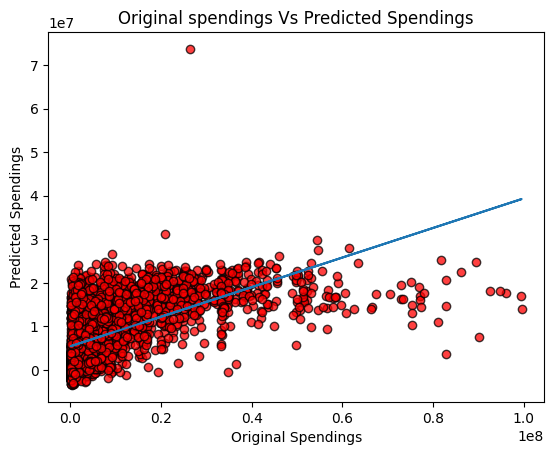

In [187]:

coefficientsA = np.polyfit(y_train, training_data_pred, 1)
polyA = np.poly1d(coefficientsA)
y_fitA = polyA(y_train)
plt.plot(y_train, y_fitA, label = "Linear Regression")
plt.scatter(y_train, training_data_pred, c = "red", edgecolor = "black", linewidth = 1, alpha = 0.75)
plt.xlabel("Original Spendings")
plt.ylabel("Predicted Spendings")
plt.title("Original spendings Vs Predicted Spendings")

Our data points are close together, which implies a close relationship between the predicted and original spendings

In [188]:
# predict X_test using the trained lin_reg model

test_data_pred = lin_reg_model.predict(X_test)
test_error_score = metrics.r2_score(y_test, test_data_pred)
print (test_error_score)
# Train the model then
# Find the r-square error of the test data and visualize as well

0.35879454129194355


Text(0.5, 1.0, 'Original spendings Vs Predicted Spendings')

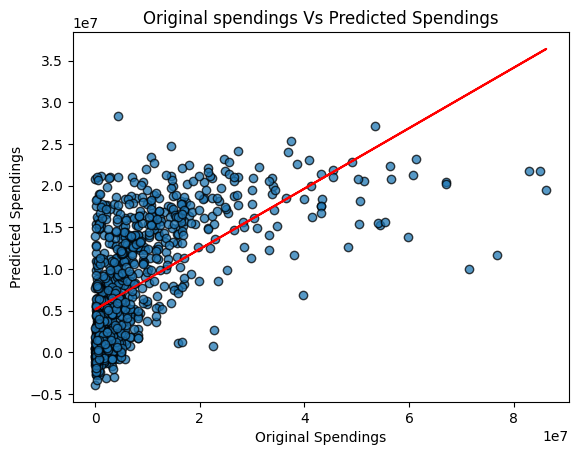

In [189]:
plt.scatter(y_test, test_data_pred, edgecolor = "black", linewidth = 1, alpha = 0.75)
coefficientsB = np.polyfit(y_test, test_data_pred, 1)
polyB = np.poly1d(coefficientsB)
y_fitB = polyB(y_test)
plt.plot(y_test, y_fitB, color = "red", label = "Linear Regression")
plt.xlabel("Original Spendings")
plt.ylabel("Predicted Spendings")
plt.title("Original spendings Vs Predicted Spendings")

# plot the graph for the test data

Data points are still close together with predicted values from the X_test when compared with the original results(y_test)

Use XGBoost to enhance the model accuracy

In [190]:
XGB = XGBRegressor()

XGB.fit(X_train, y_train)

XG_train_predict = XGB.predict(X_train)
XG_train_predict

# The xgboost improves the accuracy of the model
# This will enhance the accuracy of the X_train and Y_train models in order to improve accuracy in predicting the X_test
# Remember that X-train, y_train are the training data all through

array([ 9902897. ,  6334022. ,  5463541.5, ...,  2425126.8,   687472.4,
       16172935. ], dtype=float32)

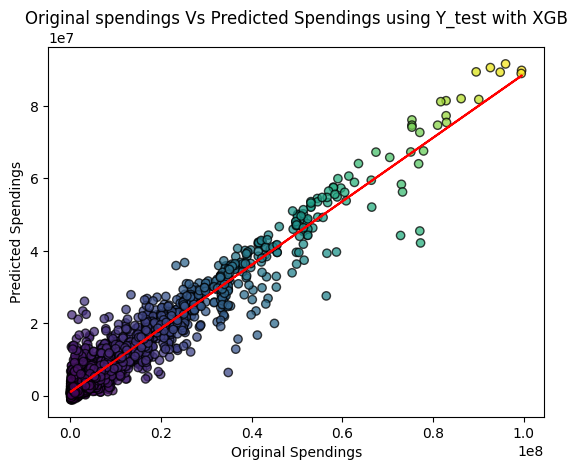

In [191]:
coefficientsb = np.polyfit(y_train, XG_train_predict, 1)
polyb = np.poly1d(coefficientsb)
y_fitb = polyb(y_train)
plt.plot(y_train, y_fitb, color = "red", label = "Linear Regression")

plt.xlabel("Original Spendings")
plt.ylabel("Predicted Spendings")
plt.title("Original spendings Vs Predicted Spendings using Y_test with XGB")
cmap = plt.cm.get_cmap("viridis")
normalize = plt.Normalize(vmin=min(y_train+XG_train_predict), vmax=max(y_train+XG_train_predict))
colors = [cmap(normalize(val)) for val in y_train+XG_train_predict]
plt.scatter(y_train, XG_train_predict, c = colors, edgecolor = "black", linewidth = 1, alpha = 0.75)

Prediction accuracy has improved significantly with XGBoost

In [192]:
#Calculate the accuracy of the XGBoost model for the y_train

error_score2 = metrics.r2_score(y_train, XG_train_predict)
mae2 = mean_absolute_error(y_train, XG_train_predict)
mse2 = mean_squared_error(y_train, XG_train_predict)
rmse2 = np.sqrt(mse2)

print("R squared Error:", error_score2)
print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("Root Mean Square Error:", rmse2)

R squared Error: 0.929364538141873
Mean Absolute Error: 1847263.8402289974
Mean Squared Error: 10696876773869.48
Root Mean Square Error: 3270608.0128730624


In [193]:
XG_test_predict = XGB.predict(X_test)
#Evaluate model performance 
#predict the values for the X_test using XGBoost 

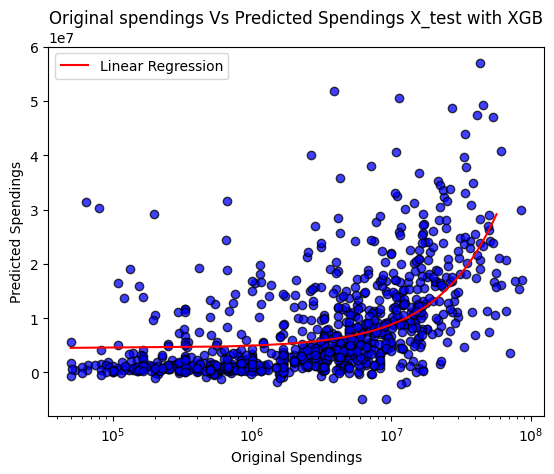

In [194]:
coefficientsD = np.polyfit(y_test, XG_test_predict, 1)
polyD = np.poly1d(coefficientsD)

x_fit = np.linspace(min(y_test), max(XG_test_predict), 100)
y_fit = polyD(x_fit)

plt.scatter(y_test, XG_test_predict, c = "b", edgecolor = "black", linewidth = 1, alpha = 0.75)
plt.plot(x_fit, y_fit, color='red', label='Linear Regression')
plt.xlabel('Original Spendings')
plt.ylabel('Predicted Spendings')
plt.title("Original spendings Vs Predicted Spendings X_test with XGB")
plt.xscale("log") # I logged the x scale to give a better outline of the relationship

#plt.yscale("log") - Both x and y axis can be logged
plt.legend()
plt.show()

In [195]:

error_score = metrics.r2_score(y_train, training_data_pred)

error_score2 = metrics.r2_score(y_train, XG_train_predict)

error_score1 = metrics.r2_score(y_test, test_data_pred)

error_score3 = metrics.r2_score(y_test, XG_test_predict)

print (error_score)
print (error_score2)
print(error_score1)
print(error_score3)

0.3399243935578451
0.929364538141873
0.35879454129194355
0.27591720356322225


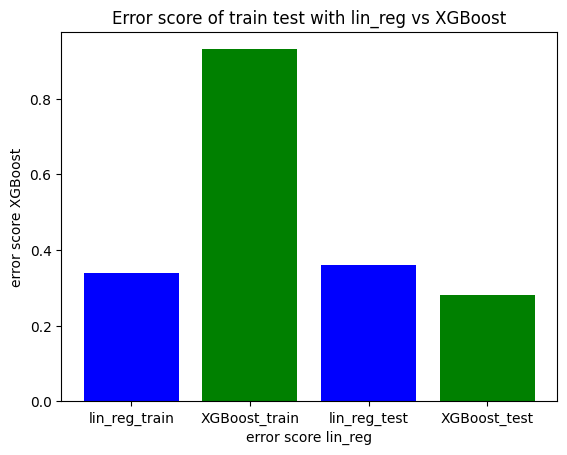

In [196]:

m = 0.34
n = 0.93
o = 0.36
p = 0.28



values = [0.34, 0.93, 0.36, 0.28]
labels = ['lin_reg_train', 'XGBoost_train', "lin_reg_test", "XGBoost_test"]

plt.bar(labels, values, color=['blue', 'green', "blue", "green"])

plt.xlabel('error score lin_reg')
plt.ylabel('error score XGBoost')
plt.title('Error score of train test with lin_reg vs XGBoost')


plt.show()

# A graph to show the performance of our linear regression models

- XGBoost model has better R-scores on the training set but didnt "generalize" well to test data, most likely due to overfitting
- The linear regression model seemed to perform "generalize" better on the test dataset because it has fewer parameters to fit.
- This helps the lin_reg model avoid overfitting, and makes it more resilient to the noise in the dataset
- cross-validation, regularization or hyperparameter tuning will improve the performance of both models

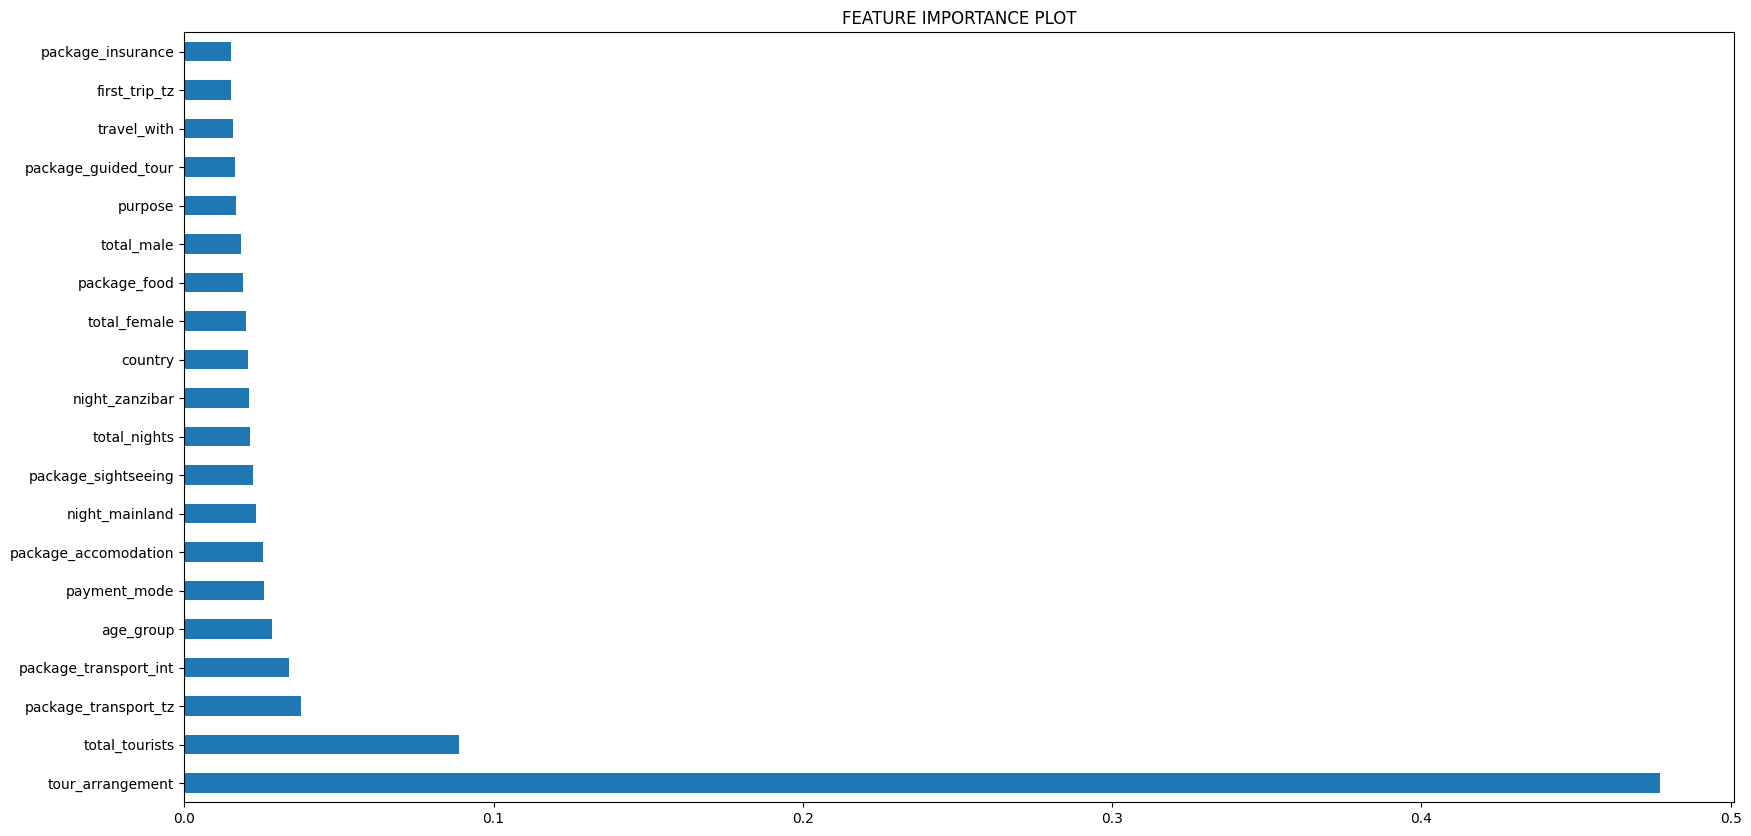

In [197]:
#Let's Visualize on the best contributed features
feat_importances = pd.Series(XGB.feature_importances_, index = X.columns)
plt.figure(figsize=(20,10))
plt.title("FEATURE IMPORTANCE PLOT")
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

- From this feature importance, most elements in the dataset had very little impact on the prediction
- This explains the overfitting in our XGBoost regression model and possibly underfitting in the linear regression model
- The extensive skewness in this dataset could have also influenced the degree of model training and hence accuracy of prediction